# 어떤 변수들이 연비에 영향을 미치는가...?

In [1]:
import pandas
from numpy import nan
from matplotlib import pyplot
import seaborn

In [5]:
df = pandas.read_csv('auto-mpg.csv', header=None) 
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']

df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# 컬럼의 데이터타입 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 데이터 정제

In [7]:
# 결측치 처리 후 타입 실수로 변환
df.horsepower = df.horsepower.replace('?',nan)
df.dropna(subset = ['horsepower'],axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## 시계열 데이터 만들어주기

In [9]:
df['model year'] = df['model year'] + 1900

In [10]:
import datetime
year = df['model year'].apply(lambda year: datetime.date(year, 1, 1)) # '연' 형식으로 지정해주기
model_year2 = pandas.to_datetime(year.values).to_period(freq='Y') # 데이트타입으로 변환 후 연도만 뽑아서 저장
df.insert(7,'model_year2',model_year2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   mpg           392 non-null    float64      
 1   cylinders     392 non-null    int64        
 2   displacement  392 non-null    float64      
 3   horsepower    392 non-null    float64      
 4   weight        392 non-null    float64      
 5   acceleration  392 non-null    float64      
 6   model year    392 non-null    int64        
 7   model_year2   392 non-null    period[A-DEC]
 8   origin        392 non-null    int64        
 9   name          392 non-null    object       
dtypes: float64(5), int64(3), object(1), period[A-DEC](1)
memory usage: 33.7+ KB


## 필요한 속성들만 선택해서 새로운 데이터프레임 생성

In [12]:
ndf = df[['mpg','cylinders','horsepower','weight','model year']]
ndf.head()

,mpg,cylinders,horsepower,weight,model year
0,18.0,8,130.0,3504.0,1970
1,15.0,8,165.0,3693.0,1970
2,18.0,8,150.0,3436.0,1970
3,16.0,8,150.0,3433.0,1970
4,17.0,8,140.0,3449.0,1970


## 변수간에 관련성이 있는지 한번 산점도를 그려서 알아보자

### 1. matplotlib 활용

<AxesSubplot:xlabel='model year', ylabel='mpg'>

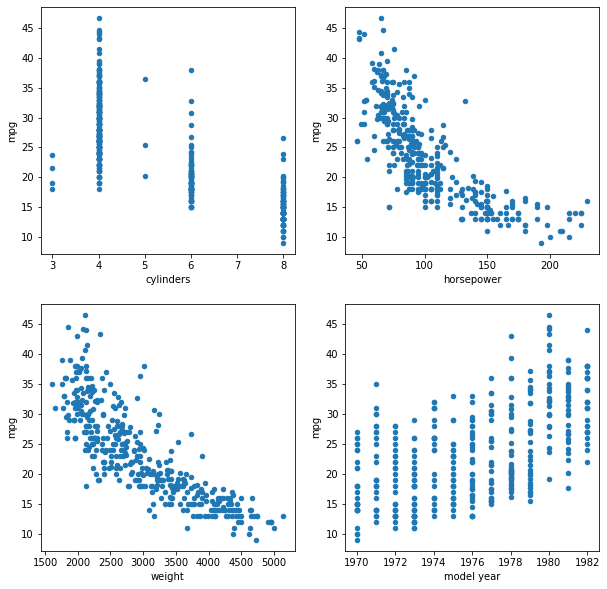

In [13]:
figure = pyplot.figure(figsize = (10,10))
ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,2)
ax3 = figure.add_subplot(2,2,3)
ax4 = figure.add_subplot(2,2,4)
ndf.plot(x='cylinders',y='mpg',kind='scatter',ax=ax1)
ndf.plot(x='horsepower',y='mpg',kind='scatter',ax=ax2)
ndf.plot(x='weight',y='mpg',kind='scatter',ax=ax3)
ndf.plot(x='model year',y='mpg',kind='scatter',ax=ax4)

### 2. seaborn 활용
- 회귀선을 그려주는 regplot

<AxesSubplot:xlabel='model year', ylabel='mpg'>

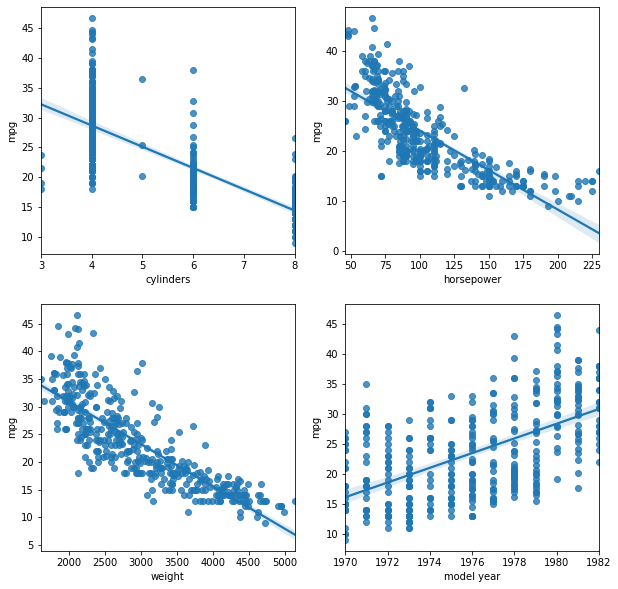

In [14]:
figure = pyplot.figure(figsize = (10,10))
ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,2)
ax3 = figure.add_subplot(2,2,3)
ax4 = figure.add_subplot(2,2,4)
seaborn.regplot(data=ndf, x='cylinders', y='mpg',ax=ax1)
seaborn.regplot(data=ndf, x='horsepower', y='mpg',ax=ax2)
seaborn.regplot(data=ndf, x='weight', y='mpg',ax=ax3)
seaborn.regplot(data=ndf, x='model year', y='mpg',ax=ax4)

## sklearn 을 통해서 데이터를 훈련시켜보자

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
x = ndf[['weight']] # 392개 데이터, 독립변수는 시리즈형말고 데이터프레임형태로 선언해줘야함
y = ndf['mpg']    # 392개 데이터

# 독립변수, 종속변수, 70%는 연습하고, 30%는 테스트 해보자, 랜덤으로 10개 뽑아줘.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(f'훈련 독립(x): {len(x_train)}') # 훈련 독립(x): 274
print(f'훈련 종속(y): {len(y_train)}') # 훈련 종속(y): 274
print(f'검증 독립(x): {len(x_test)}') # 검증 독립(x): 118
print(f'검증 종속(y): {len(y_test)}') # 검증 종속(y): 118

훈련 독립(x): 274
훈련 종속(y): 274
검증 독립(x): 118
검증 종속(y): 118


In [17]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

## 결정계수 : 어느정도 적합성을 보이는지
- 대략 68퍼센트정도 정확하다

In [20]:
r_square = lr.score(x_test, y_test)
print(f'결정계수 : {r_square} ')

결정계수 : 0.6822458558299325 


c:\users\hk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


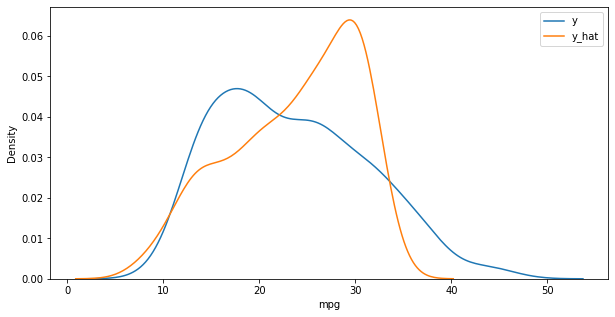

In [22]:
# 예측함수
# x를 통해 예측된 가짜 y를 알아보자
y_hat = lr.predict(x)

pyplot.figure(figsize=(10,5))
# 히스토그램 그래프, 하나의 그래프에 선 2개 출력해보자
ax1 = seaborn.distplot(y, hist = False, label = 'y') # 진짜 y
ax2 = seaborn.distplot(y_hat, hist = False, label = 'y_hat', ax=ax1) # 예측 y

pyplot.legend(loc='best')

## 다항회귀분석으로 만들어서 단순회귀분석과 비교해보자

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [49]:
x = ndf[['weight']] # 독립변수는 항상 데이터프레임 형태로 만들어주자!
y = ndf['mpg'] # 종속변수

In [50]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)
len(train_x), len(test_x), len(train_y), len(test_y)

(274, 118, 274, 118)

In [51]:
poly = PolynomialFeatures(degree=2) # 2차항 적용

train_x_poly = poly.fit_transform(train_x) # train_x 데이터를 2차항으로 변환

train_x_poly.shape # (274, 3) 3개의 열로 구성

(274, 3)

In [52]:
pr = LinearRegression()
pr.fit(train_x_poly, train_y) # fit에 다항변수를 넣으면 다항회귀분석으로 그려줌

LinearRegression()

In [53]:
test_x_poly = poly.fit_transform(test_x) # 테스트 데이터 다항으로 변환

r_square = pr.score(test_x_poly, test_y) # 결정계수 뽑아보기
print(f'결정계수 : {r_square} ') # 결정계수가 높아졌다!!

결정계수 : 0.7366029825167753 


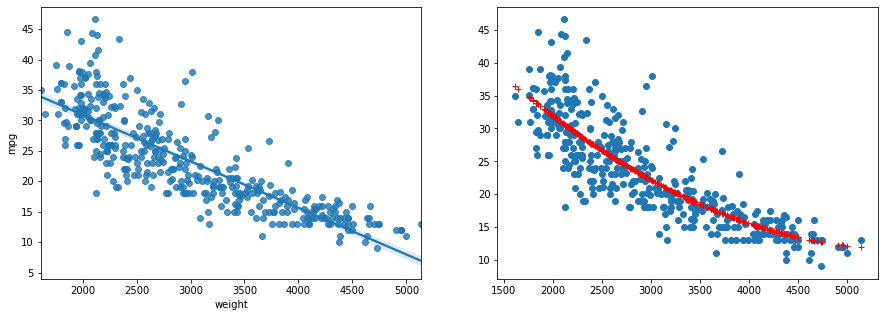

In [68]:
# 원본데이터와 모델데이터 그래프
x_poly = poly.transform(x)
y_hat = pr.predict(x_poly)

figure = pyplot.figure(figsize = (15,5))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

seaborn.regplot(x='weight', y='mpg', data=df, ax=ax1) # 회귀선

# 훈련한 그래프와 다항회귀선(곡선모양)
ax2.plot(ndf['weight'],y,'o')
ax2.plot(x, y_hat, 'r+')

## 히스토그램으로 표기

c:\users\hk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


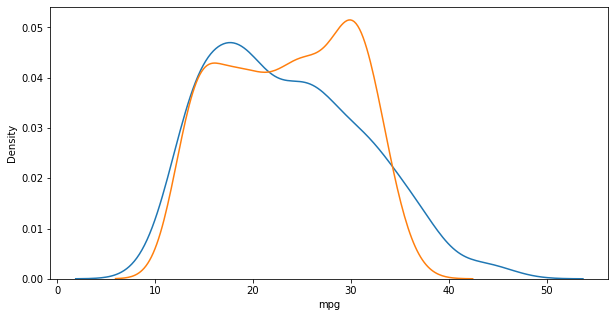

In [70]:
pyplot.figure(figsize=(10,5))
ax1 = seaborn.distplot(y, hist=False, label='y')
ax2 = seaborn.distplot(y_hat, hist=False, label='y_hat',ax=ax1)